<a href="https://colab.research.google.com/github/mariasiqueira018/EQM2118_ML_to_predicte_CS/blob/main/ML_para_predizer_CS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PONTIFICAL CATHOLIC UNIVERSITY OF RIO DE JANEIRO - PUC Rio**

**DEPARTMENT OF CHEMICAL AND MATERIALS ENGINEERING**

**EQM2118 - MATHEMATICAL MODELING WITH ARTIFICIAL INTELLIGENCE - 2024.1**

**STUDENTS:** Alexandre Miguel and Maria Heloisa


**Use of Machine Learning to Predict the Compressive Strength of Concrete with Slag and Fly Ash at 28 Days**

# **1. DATABASE**

## **1.1 Including libraries**

In [ ]:
# Including basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## **1.2 Importing database**

In [ ]:
# Importing dataset from Google Drive (Spreadsheet saved in Google Drive)
from google.colab import drive # Creating Google Drive
drive.mount('/content/drive') # Creating Google Drive

# Reading dataset
dataset0 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/EQM2118/EQM2118 - TRABALHOS/Concrete_Data.xlsx', sheet_name='Sheet0')

## Changing column names to make typing easier
columns={'CEMENTE\n(component 1)\n (kg in a m^3 mixture)':'cement',
         'BLAST FURNACE SLAG (component 2)\n(kg in a m^3 mixture)':'blast_furnace_slag',
         'FLY ASH\n(component 3)\n(kg in a m^3 mixture)':'fly_ash',
         'WATER\n (component 4)\n(kg in a m^3 mixture)':'water',
         'SUPERPLASTICIZER (component 5)\n(kg in a m^3 mixture)':'superplasticizer',
         'COARSE AGGREGATE\n (component 6)\n(kg in a m^3 mixture)':'coarse_aggregate',
         'FINE AGGREGATE (component 7)\n(kg in a m^3 mixture)':'fine_aggregate',
         'AGE\n(day)':'age',
         'CONCRETE COMPRESSIVE STRENGTH\n(MPa, megapascals) ':'mpa'}

dataset0.rename (columns=columns, inplace=True)
dataset0.head()
dataset0 # Viewing the dataset

Mounted at /content/drive


cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      coarse_aggregate  fine_aggregate  age        mpa  
0               1040.0           676.0   28  79.986111  
1               1055.0           676.0   28  61.887366  
2                932.0           594.0  270  40.269535  
3                932.0           594.0  365  41.052780  
4                978.4           825.5  360  44.296075  
...                ...             ...  ...        ...  
1025             870.1           768.3   28  44.284354  
1026             817.9           813.4   28  31.178794  
1027             892.4           780.0   28  23.696601  
1028             989.6           788.9   28  32.768036  
1029             864.5           761.5   28  32.401235  

[1030 rows x 9 columns]

## **1.3 Statistical summary**

In [ ]:
# Number of rows and columns
print('The data consists of {columns} columns and {rows} rows'.format(columns=dataset0.shape[1],rows=dataset0.shape[0]))

# Generate a statistical summary of the data
summary = dataset0.describe()
summary

The data consists of 9 columns and 1030 rows


cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.165631           73.895485    54.187136   181.566359   
std     104.507142           86.279104    63.996469    21.355567   
min     102.000000            0.000000     0.000000   121.750000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.270000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       superplasticizer  coarse_aggregate  fine_aggregate          age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.203112        972.918592      773.578883    45.662136   
std            5.973492         77.753818       80.175427    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.350000        968.000000      779.510000    28.000000   
75%           10.160000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

               mpa  
count  1030.000000  
mean     35.817836  
std      16.705679  
min       2.331808  
25%      23.707115  
50%      34.442774  
75%      46.136287  
max      82.599225

## **1.4 Preprocessing**

###**1.4.1 Carrying out data processing**

In [ ]:
# Deleting rows with no data
number_rows_total = dataset0.shape[0] # Number of rows in the matrix
number_rows_with_inf = dataset0.dropna().shape[0] # Deletes lines that NaN - Function to remove
rows_exc1 = number_rows_total - number_rows_with_inf # Difference between one and the other
per_exc_wi = (1- (number_rows_with_inf/number_rows_total))*100 # Percentage of excluded
print("Percentage of rows deleted from the database without information was: {:.2f}%".format(per_exc_wi))

# Selecting the data for age of 28 days
# Data with information on concrete compressive strength at 28 days
dataset0_final = dataset0 [dataset0['age'] == 28]
number_rows_new_data = dataset0_final.shape[0] # Number of rows in the matrix
rows_exc2 = number_rows_total - number_rows_new_data # Difference between one and the other
per_exc_age = (1- (number_rows_new_data/number_rows_total))*100 # Percentage of excluded
print("Percentage of rows deleted from the database ages other than 28 days was: {:.2f}%".format(per_exc_age))

dataset0_final # Viewing the dataset

Percentage of rows deleted from the database without information was: 0.00%
Percentage of rows deleted from the database ages other than 28 days was: 58.74%


cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
7      380.0                95.0      0.0  228.0               0.0   
8      266.0               114.0      0.0  228.0               0.0   
9      475.0                 0.0      0.0  228.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      coarse_aggregate  fine_aggregate  age        mpa  
0               1040.0           676.0   28  79.986111  
1               1055.0           676.0   28  61.887366  
7                932.0           594.0   28  36.447770  
8                932.0           670.0   28  45.854291  
9                932.0           594.0   28  39.289790  
...                ...             ...  ...        ...  
1025             870.1           768.3   28  44.284354  
1026             817.9           813.4   28  31.178794  
1027             892.4           780.0   28  23.696601  
1028             989.6           788.9   28  32.768036  
1029             864.5           761.5   28  32.401235  

[425 rows x 9 columns]

In [ ]:
# Remove the 'age' column before calculating the correlation matrix as it is treated as a classification variable
dataset = dataset0_final.drop(columns=['age'])
dataset # Viewing the dataset

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
7      380.0                95.0      0.0  228.0               0.0   
8      266.0               114.0      0.0  228.0               0.0   
9      475.0                 0.0      0.0  228.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      coarse_aggregate  fine_aggregate        mpa  
0               1040.0           676.0  79.986111  
1               1055.0           676.0  61.887366  
7                932.0           594.0  36.447770  
8                932.0           670.0  45.854291  
9                932.0           594.0  39.289790  
...                ...             ...        ...  
1025             870.1           768.3  44.284354  
1026             817.9           813.4  31.178794  
1027             892.4           780.0  23.696601  
1028             989.6           788.9  32.768036  
1029             864.5           761.5  32.401235  

[425 rows x 8 columns]

### **1.4.2 Statistical analysis of data**

In [ ]:
# Number of rows and columns
print('The data consists of {columns} columns and {rows} rows'.format(columns=dataset.shape[1],rows=dataset.shape[0]))

# Generate a statistical summary of the data
summary = dataset.describe()
summary

The data consists of 8 columns and 425 rows


cement  blast_furnace_slag     fly_ash       water  \
count  425.000000          425.000000  425.000000  425.000000   
mean   265.443388           86.285012   62.794706  183.059082   
std    104.670527           87.826404   66.227538   19.329394   
min    102.000000            0.000000    0.000000  121.750000   
25%    160.200000            0.000000    0.000000  171.000000   
50%    261.000000           94.700000   60.000000  185.000000   
75%    323.700000          160.500000  120.000000  193.300000   
max    540.000000          359.400000  200.100000  247.000000   

       superplasticizer  coarse_aggregate  fine_aggregate         mpa  
count        425.000000        425.000000      425.000000  425.000000  
mean           6.994605        956.059129      764.376635   36.748480  
std            5.392075         83.801548       73.120060   14.711211  
min            0.000000        801.000000      594.000000    8.535713  
25%            0.000000        882.600000      712.000000   26.227667  
50%            7.800000        953.200000      769.300000   33.762261  
75%           10.300000       1013.200000      811.500000   44.388465  
max           32.200000       1145.000000      992.600000   81.751169

####**1.4.2.1 Histograms**

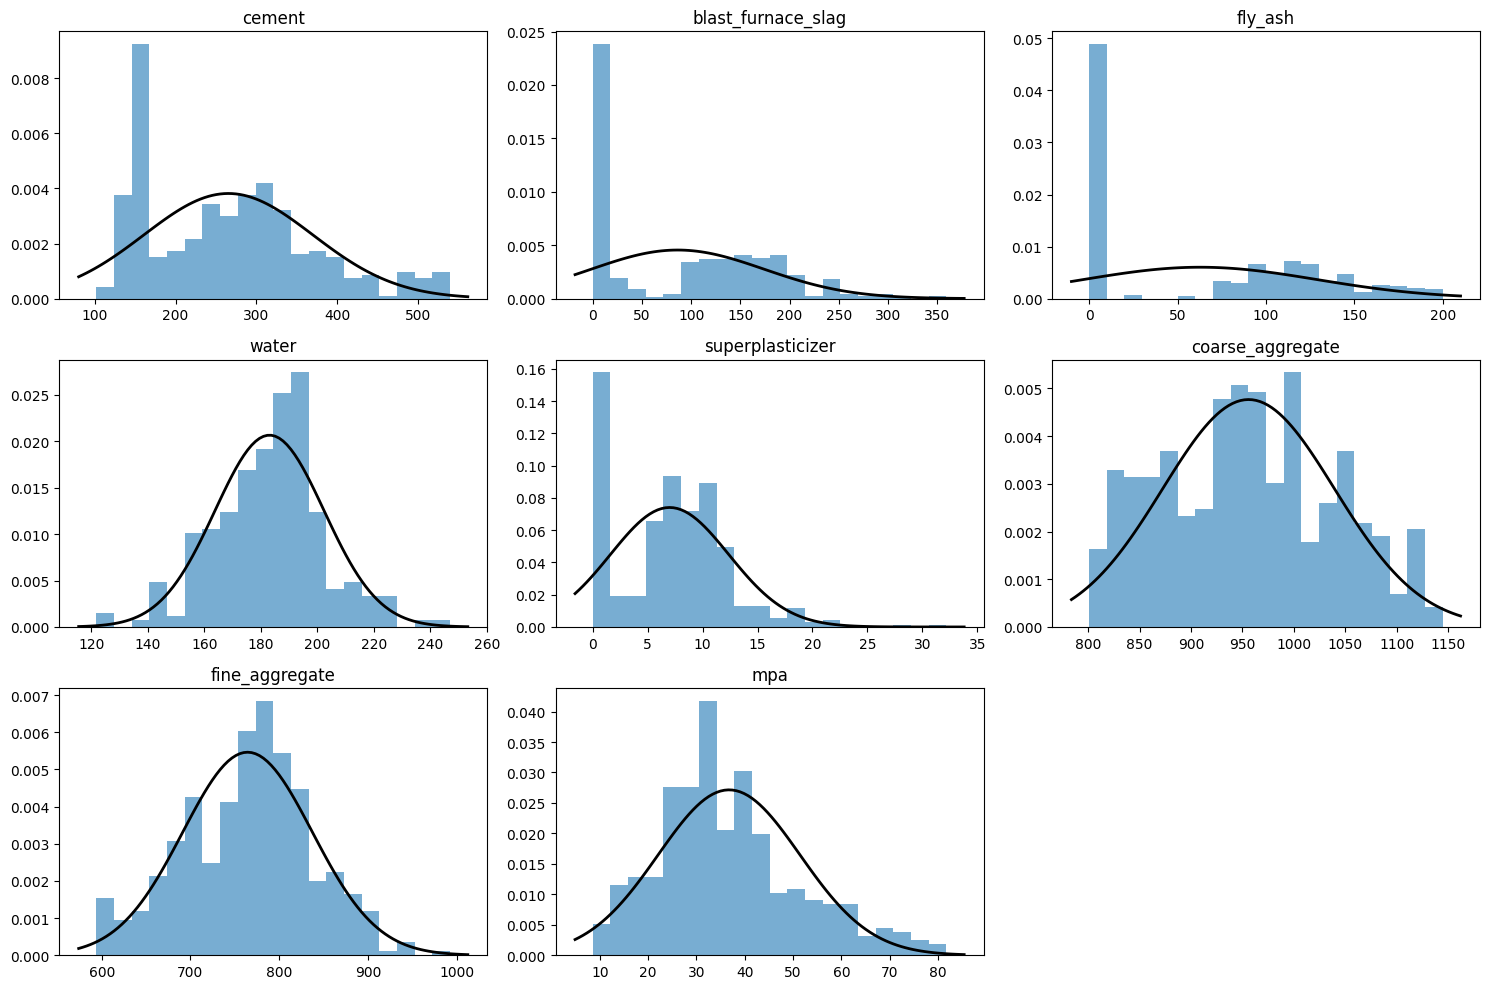

In [ ]:
# Visualization of data distribution
from scipy.stats import norm

plt.figure(figsize=(15, 10))
n_cols = dataset.shape[1]
n_rows = (n_cols - 1) // 3 + 1  # Calculating the number of rows based on the number of columns

for i, column in enumerate(dataset.columns):
    plt.subplot(n_rows, 3, i + 1)
    data = dataset[column].dropna()  # Removing NaN values if any
    mu, std = norm.fit(data)  # Fit a normal distribution to the data
    plt.hist(data, bins=20, density=True, alpha=0.6)  # Plot histogram with density

    # Plot the normal distribution line
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    plt.title(column)
    plt.tight_layout()

# Save the figure
plt.savefig('FigHist.png')
plt.show()

### **1.4.3 Correlations**

For this work, the Spearman correlation method will be used, due to the possibility of application in non-linear situations.

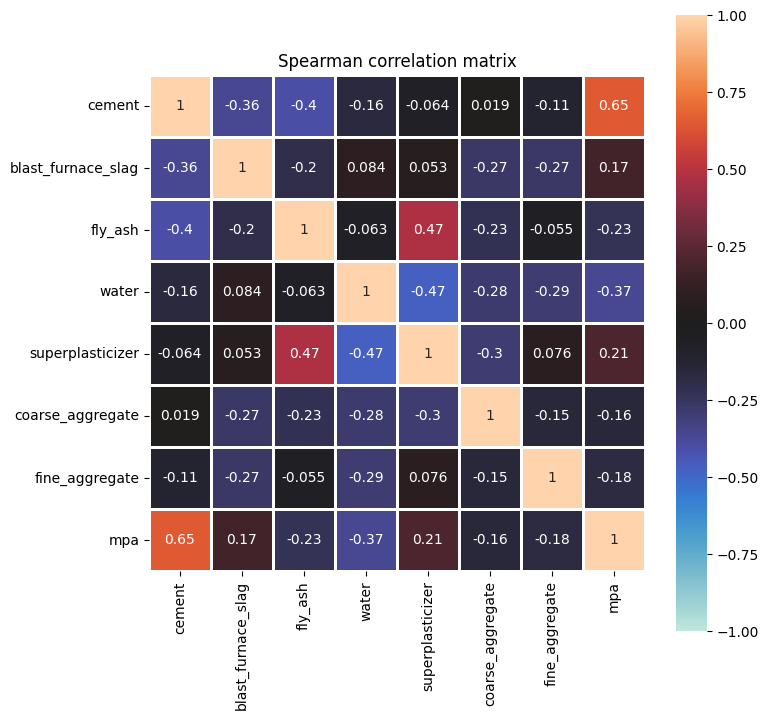

In [ ]:
# SPEARMAN CORRELATION
## This correlation is most appropriate when there is no linearity between the variables.
correlation = dataset.corr(method='spearman')
fig = plt.figure(figsize=(8, 8))
ax = sns.heatmap(correlation,  # seaborn - Heatmap
                 vmin=-1,
                 vmax=1,
                 center=0,
                 square=True,
                 annot=True,
                 linewidths=0.8)
ax.set_ylim(len(correlation), 0)
plt.title('Spearman correlation matrix')
#plt.savefig('FigCorrSpearman.pdf', format='pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.savefig('FigCorrSpearman.png')
plt.show()

###**1.4.4 Outliers visualization**

####**1.4.4.1 Using boxplot**

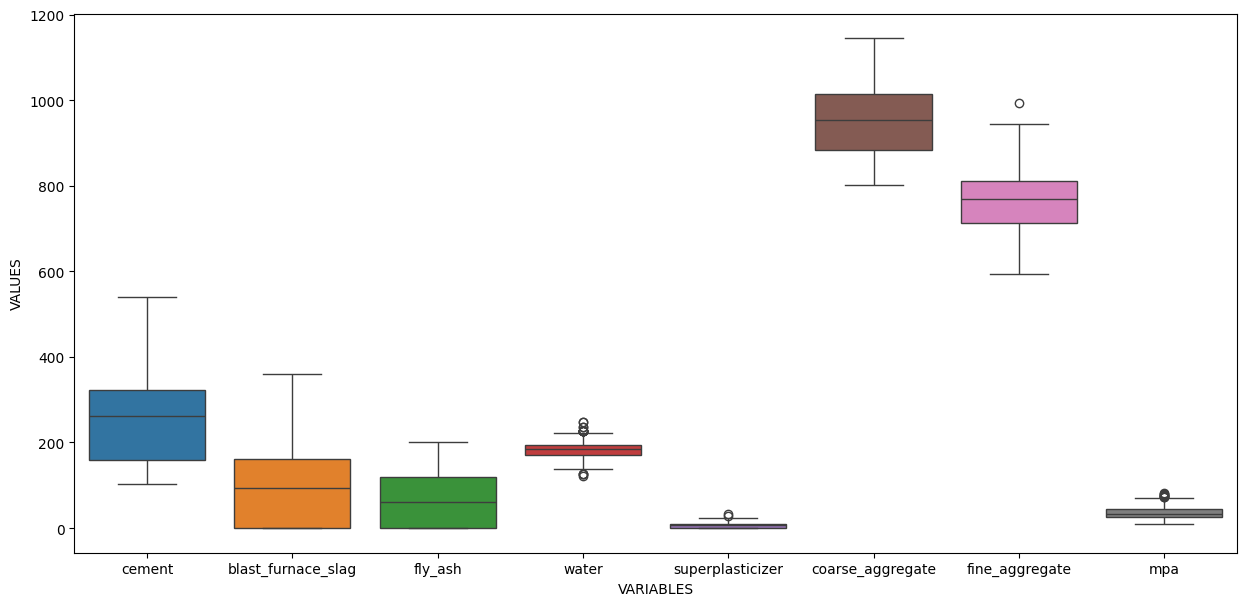

In [ ]:
# Constructing the box plot for outlier visualization
fig = plt.figure(figsize = (15, 7))
ax = sns.boxplot(data = dataset)
ax.set_xlabel('VARIABLES')
ax.set_ylabel('VALUES')
plt.savefig('FigBoxplot.png')

#### **1.4.4.2 Statistical Process Control (SPC)**

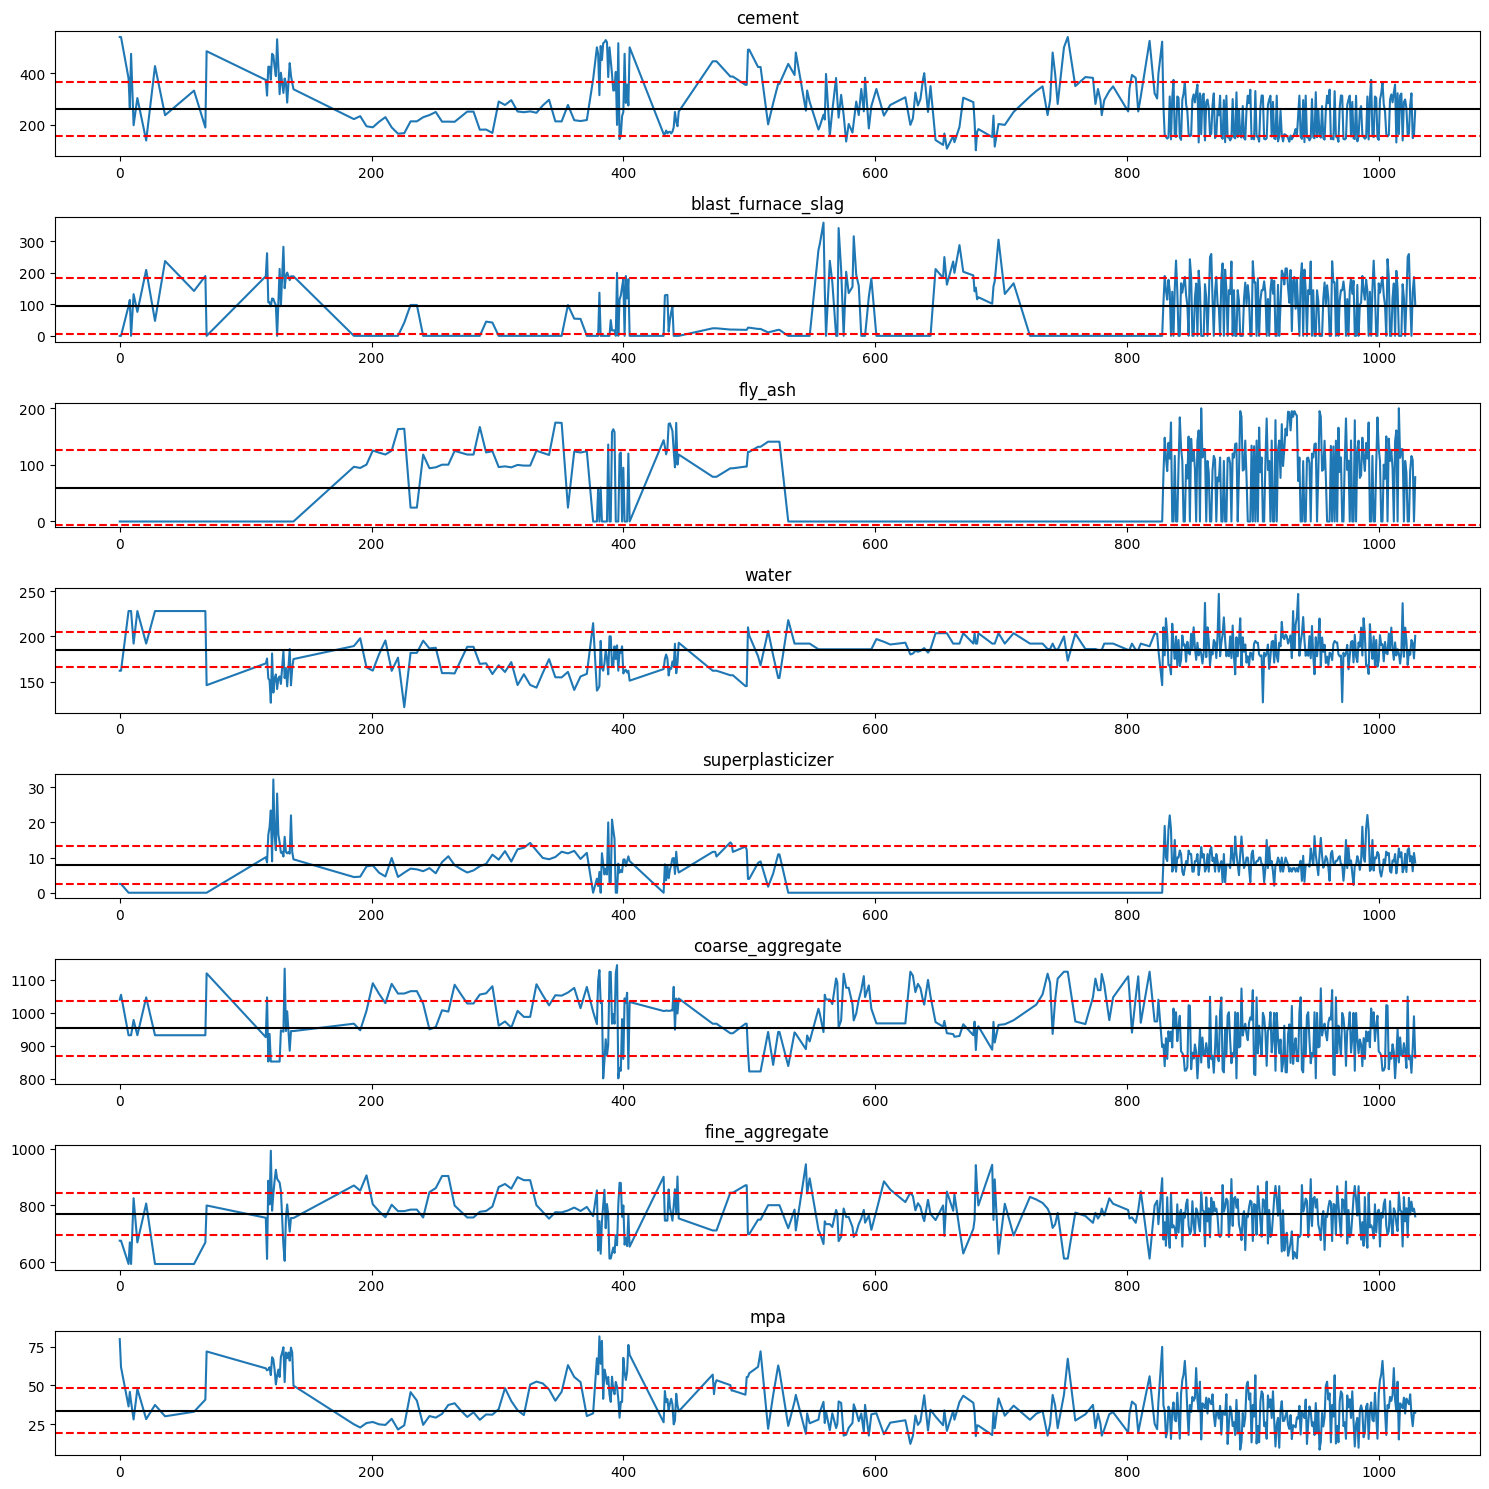

In [ ]:
# When the process is within these limits, it is said to be "in control."
fig, ax = plt.subplots(8, figsize=(15, 15))  # Subplots where 9 variables are being worked with
for i in range(dataset.shape[1]):  # Creating multiple charts with the limits
    x = dataset.iloc[:, i]
    # mean = x.mean() # mean
    mean = x.median()  # median as mean line
    std = x.std(ddof=1)  # standard deviation

    LCL = mean - std  # Lower control limit
    UCL = mean + std  # Upper control limit

    ax[i].plot(x.index, x.values)
    ax[i].set_title(dataset.columns[i])  # Set the title with the column name

    ax[i].axhline(mean, c='k')
    ax[i].axhline(LCL, ls='--', c='r')
    ax[i].axhline(UCL, ls='--', c='r')

plt.tight_layout()
plt.show()

# SETTING UP THE GRAPH
# plt.savefig('FigOutlier-2.pdf', format='pdf', dpi=300, transparent=True, bbox_inches='tight')
# plt.savefig('FigGraphlines.png')

###**1.4.4 Handling outliers**

# **2. PREDICTION CONCRETE STRENGTH AT 28 DAYS**

## **2.1 Data preparation and division**

In [ ]:
# Division of data into input and output
input_data = dataset[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate']]
output_data = dataset['mpa']

In [ ]:
# Division of data into training and testing sets
from sklearn.model_selection import train_test_split # Including libraries
train_inp, test_inp, train_out, test_out = train_test_split(input_data, output_data, test_size=0.3, random_state=42)

## 70% of the data were considered for model training and 30% for validation and testing

In [ ]:
# Normalize the train input data
from sklearn.preprocessing import MinMaxScaler # Including libraries
scaler1 = MinMaxScaler(feature_range=(0, 1))
train_input = scaler1.fit_transform(train_inp)  # Normalize training input data
test_input = scaler1.transform(test_inp)  # Normalize test input data

In [ ]:
# Normalize the training output data
scaler2 = MinMaxScaler(feature_range=(0, 1))
train_output = scaler2.fit_transform(train_out.values.reshape(-1, 1)).ravel()  # Normalize training output data

## **2.2 Decision Tree**

### **2.2.1 Model training**

In [ ]:
# Train the Decision Tree Model with GridSearchCV
from sklearn.tree import DecisionTreeRegressor # Including libraries
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeRegressor(random_state=42)

In [ ]:
# Hyperparameter configuration for GridSearchCV
dt_param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, n_jobs=-1)
dt_grid_search.fit(train_input, train_output)

# Best parameters found for Decision Tree
print("Best parameters found for Decision Tree:")
print(dt_grid_search.best_params_)

Best parameters found for Decision Tree:
{'criterion': 'squared_error', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [ ]:
# Viewing cross-validation process for each hyperparameter combination tested
pd.DataFrame(dt_grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.001715      0.000202         0.000803        0.000103   
1         0.001406      0.000103         0.000708        0.000054   
2         0.001759      0.000588         0.000774        0.000103   
3         0.001266      0.000082         0.000689        0.000055   
4         0.002065      0.001163         0.000724        0.000068   
..             ...           ...              ...             ...   
355       0.001428      0.000079         0.000624        0.000037   
356       0.002914      0.000913         0.000662        0.000023   
357       0.002284      0.001813         0.000635        0.000071   
358       0.004179      0.003100         0.000818        0.000109   
359       0.001558      0.000182         0.000640        0.000104   

    param_criterion param_max_depth param_min_samples_leaf  \
0     squared_error               1                      1   
1     squared_error               1                      1   
2     squared_error               1                      1   
3     squared_error               1                      1   
4     squared_error               1                      1   
..              ...             ...                    ...   
355         poisson              20                      4   
356         poisson              20                      4   
357         poisson              20                      4   
358         poisson              20                      4   
359         poisson              20                      4   

    param_min_samples_split param_splitter  \
0                         2           best   
1                         2         random   
2                         5           best   
3                         5         random   
4                        10           best   
..                      ...            ...   
355                       2         random   
356                       5           best   
357                       5         random   
358                      10           best   
359                      10         random   

                                                params  split0_test_score  \
0    {'criterion': 'squared_error', 'max_depth': 1,...           0.312556   
1    {'criterion': 'squared_error', 'max_depth': 1,...           0.243328   
2    {'criterion': 'squared_error', 'max_depth': 1,...           0.312556   
3    {'criterion': 'squared_error', 'max_depth': 1,...           0.243328   
4    {'criterion': 'squared_error', 'max_depth': 1,...           0.312556   
..                                                 ...                ...   
355  {'criterion': 'poisson', 'max_depth': 20, 'min...           0.614628   
356  {'criterion': 'poisson', 'max_depth': 20, 'min...           0.629051   
357  {'criterion': 'poisson', 'max_depth': 20, 'min...           0.614628   
358  {'criterion': 'poisson', 'max_depth': 20, 'min...           0.638833   
359  {'criterion': 'poisson', 'max_depth': 20, 'min...           0.633597   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.087614           0.149708           0.315960   
1             0.104028           0.295103           0.198385   
2             0.087614           0.149708           0.315960   
3             0.104028           0.295103           0.198385   
4             0.087614           0.149708           0.315960   
..                 ...                ...                ...   
355           0.516983           0.685277           0.595935   
356           0.229216           0.711283           0.709995   
357           0.516983           0.685277           0.595935   
358           0.166129           0.758377           0.714664   
359           0.648117           0.446432           0.568860   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
0             0.393727         0.251913        0.114307              289  
1             0.318328         0.2

In [49]:
# Get GridSearchCV results in a DataFrame
results_dt = pd.DataFrame(dt_grid_search.cv_results_)[['params', 'rank_test_score', 'mean_test_score']]

# Sort the results by the 'mean_test_score' column in descending order
sorted_results_dt = results_dt.sort_values(by='mean_test_score', ascending=False)

# Display the ordered DataFrame
sorted_results_dt

params  rank_test_score  \
73   {'criterion': 'squared_error', 'max_depth': 20...                1   
345  {'criterion': 'poisson', 'max_depth': 20, 'min...                2   
331  {'criterion': 'poisson', 'max_depth': 10, 'min...                3   
77   {'criterion': 'squared_error', 'max_depth': 20...                4   
163  {'criterion': 'friedman_mse', 'max_depth': 20,...                5   
..                                                 ...              ...   
187  {'criterion': 'absolute_error', 'max_depth': 1...              352   
185  {'criterion': 'absolute_error', 'max_depth': 1...              352   
183  {'criterion': 'absolute_error', 'max_depth': 1...              352   
181  {'criterion': 'absolute_error', 'max_depth': 1...              352   
193  {'criterion': 'absolute_error', 'max_depth': 1...              352   

     mean_test_score  
73          0.737105  
345         0.733239  
331         0.731346  
77          0.729241  
163         0.725837  
..               ...  
187         0.230927  
185         0.230927  
183         0.230927  
181         0.230927  
193         0.230927  

[360 rows x 3 columns]

In [ ]:
# ADJUST THE MODEL WITH THE BEST PARAMETERS FOUND
best_dt_model = dt_grid_search.best_estimator_
best_dt_model.fit(train_input, train_output)

DecisionTreeRegressor(max_depth=20, random_state=42, splitter='random')

In [ ]:
# VISUALIZE THE DECISION TREE
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Correct column name access
dot_data_dt = export_graphviz(best_dt_model, out_file=None,
                           feature_names=train_inp.columns,
                           filled=True)

# Create graph from dot data
graph = pydotplus.graph_from_dot_data(dot_data_dt)

# Display the decision tree
Image(graph.create_png())

### **2.2.2 Prediction on training set**

In [ ]:
# PREDICTION ON TRAINING SET
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Including libraries
dt_train_pred = best_dt_model.predict(train_input)

# Denormalization
dt_train_pred_des = scaler2.inverse_transform(dt_train_pred.reshape(-1, 1))

# Calculate metrics for the Random Forest model on the training set
dt_train_mse = mean_squared_error(train_out, dt_train_pred_des)
dt_train_mae = mean_absolute_error(train_out, dt_train_pred_des)
dt_train_r2 = r2_score(train_out, dt_train_pred_des)

print("Decision tree train set results:")
print("Mean Squared Error (MSE): {:.2f}".format(dt_train_mse))
print("Mean Absolute Error (MAE): {:.2f}".format(dt_train_mae))
print("R² Score: {:.2f}".format(dt_train_r2))

Decision tree train set results:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.00
R² Score: 1.00


### **2.2.3 Prediction on test set**

In [ ]:
# PREDICTION ON TEST SET
dt_test_pred = best_dt_model.predict(test_input)
dt_test_pred_des = scaler2.inverse_transform(dt_test_pred.reshape(-1, 1))
output_pred_test_dt = dt_test_pred_des.ravel()  # Reshape the vector

# Metrics to evaluate the test set
mae_test_dt = mean_absolute_error(test_out, dt_test_pred_des)
mse_test_dt = mean_squared_error(test_out, dt_test_pred_des)
r2_test_dt = r2_score(test_out, output_pred_test_dt)

print("Decision tree test set results:")
print("Mean Squared Error (MSE): {:.2f}".format(mse_test_dt))
print("Mean Absolute Error (MAE): {:.2f}".format(mae_test_dt))
print("R² Score: {:.2f}".format(r2_test_dt))

Decision tree test set results:
Mean Squared Error (MSE): 81.36
Mean Absolute Error (MAE): 4.97
R² Score: 0.72


## **2.3 Random Forest**

### **2.3.1 Model training**

In [ ]:
# Train the Random Forest Model with GridSearchCV
from sklearn.ensemble import RandomForestRegressor #Including librasies

# Defining the model
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
# Hyperparameter configuration for GridSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [1, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(train_input, train_output)

# Best parameters found for Random Forest
print("Best parameters found for Random Forest:")
print(rf_grid_search.best_params_)

Best parameters found for Random Forest:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
# Viewing cross-validation process for each hyperparameter combination tested
pd.DataFrame(rf_grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.222170      0.010094         0.006576        0.000549   
1         0.454283      0.010272         0.012078        0.000338   
2         0.650263      0.008013         0.018189        0.001418   
3         0.218878      0.010171         0.006432        0.000156   
4         0.601771      0.145851         0.017039        0.004847   
..             ...           ...              ...             ...   
130       0.550360      0.007926         0.013229        0.000642   
131       0.814876      0.024097         0.019595        0.001294   
132       0.259743      0.006164         0.006887        0.000377   
133       0.953647      0.285647         0.031875        0.009239   
134       1.747945      0.130427         0.039246        0.013136   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
0                 1                      1                       2   
1                 1                      1                       2   
2                 1                      1                       2   
3                 1                      1                       5   
4                 1                      1                       5   
..              ...                    ...                     ...   
130              20                      4                       5   
131              20                      4                       5   
132              20                      4                      10   
133              20                      4                      10   
134              20                      4                      10   

    param_n_estimators                                             params  \
0                  100  {'max_depth': 1, 'min_samples_leaf': 1, 'min_s...   
1                  200  {'max_depth': 1, 'min_samples_leaf': 1, 'min_s...   
2                  300  {'max_depth': 1, 'min_samples_leaf': 1, 'min_s...   
3                  100  {'max_depth': 1, 'min_samples_leaf': 1, 'min_s...   
4                  200  {'max_depth': 1, 'min_samples_leaf': 1, 'min_s...   
..                 ...                                                ...   
130                200  {'max_depth': 20, 'min_samples_leaf': 4, 'min_...   
131                300  {'max_depth': 20, 'min_samples_leaf': 4, 'min_...   
132                100  {'max_depth': 20, 'min_samples_leaf': 4, 'min_...   
133                200  {'max_depth': 20, 'min_samples_leaf': 4, 'min_...   
134                300  {'max_depth': 20, 'min_samples_leaf': 4, 'min_...   

     split0_test_score  split1_test_score  split2_test_score  \
0             0.357180           0.138735           0.274972   
1             0.357975           0.139714           0.277000   
2             0.356388           0.150128           0.271819   
3             0.357180           0.138735           0.274972   
4             0.357975           0.139714           0.277000   
..                 ...                ...                ...   
130           0.776545           0.583803           0.746504   
131           0.779644           0.581796           0.748876   
132           0.769189           0.578561           0.741485   
133           0.773044           0.571184           0.741306   
134           0.775309           0.570068           0.743612   

     split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0             0.360825           0.432653         0.312873        0.100370   
1             0.361555           0.439029         0.315055        0.101554   
2             0.359595           0.441761         0.315938        0.098806   
3             0.360825           0.432653         0.312873        0.100370   
4             0.361555           0.439029         0.315055        0.101554   
..                 ...                ...              ...             ...   
130           0.794795           0.832925         0.746914        0.086225   
131           0.7

In [ ]:
# Get GridSearchCV results in a DataFrame
results_rf = pd.DataFrame(rf_grid_search.cv_results_)[['params', 'rank_test_score', 'mean_test_score']]

# Sort the results by the 'mean_test_score' column in descending order
sorted_results_rf = results_rf.sort_values(by='mean_test_score', ascending=False)

# Display the ordered DataFrame
sorted_results_rf

params  rank_test_score  \
110  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...                1   
83   {'max_depth': 10, 'min_samples_leaf': 1, 'min_...                2   
109  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...                3   
82   {'max_depth': 10, 'min_samples_leaf': 1, 'min_...                4   
108  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...                5   
..                                                 ...              ...   
6    {'max_depth': 1, 'min_samples_leaf': 1, 'min_s...              127   
21   {'max_depth': 1, 'min_samples_leaf': 4, 'min_s...              127   
3    {'max_depth': 1, 'min_samples_leaf': 1, 'min_s...              127   
24   {'max_depth': 1, 'min_samples_leaf': 4, 'min_s...              127   
0    {'max_depth': 1, 'min_samples_leaf': 1, 'min_s...              127   

     mean_test_score  
110         0.798736  
83          0.797979  
109         0.796345  
82          0.795384  
108         0.792615  
..               ...  
6           0.312873  
21          0.312873  
3           0.312873  
24          0.312873  
0           0.312873  

[135 rows x 3 columns]

In [ ]:
# ADJUST THE MODEL WITH THE BEST PARAMETERS FOUND
best_rf_model = rf_grid_search.best_estimator_
best_rf_model.fit(train_input, train_output)

RandomForestRegressor(max_depth=20, n_estimators=300, random_state=42)

### **2.3.2 Prediction on training set**

In [ ]:
# PREDICTION ON TRAINING SET
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Including libraries
rf_train_pred = best_rf_model.predict(train_input)

# Denormalization
rf_train_pred_des = scaler2.inverse_transform(rf_train_pred.reshape(-1, 1))

# Calculate metrics for the Random Forest model on the training set
rf_train_mse = mean_squared_error(train_out, rf_train_pred_des)
rf_train_mae = mean_absolute_error(train_out, rf_train_pred_des)
rf_train_r2 = r2_score(train_out, rf_train_pred_des)

print("Random Forest train set results:")
print("Mean Squared Error (MSE): {:.2f}".format(rf_train_mse))
print("Mean Absolute Error (MAE): {:.2f}".format(rf_train_mae))
print("R² Score: {:.2f}".format(rf_train_r2))

Random Forest train set results:
Mean Squared Error (MSE): 4.47
Mean Absolute Error (MAE): 1.46
R² Score: 0.98


### **2.3.3 Prediction on test set**

In [ ]:
# PREDICTION ON TEST SET
rf_test_pred = best_rf_model.predict(test_input)
rf_test_pred_des = scaler2.inverse_transform(rf_test_pred.reshape(-1, 1))
output_pred_test_rf = rf_test_pred_des.ravel()  # Reshape the vector

# Metrics to evaluate the test set
mae_test_rf = mean_absolute_error(test_out, rf_test_pred_des)
mse_test_rf = mean_squared_error(test_out, rf_test_pred_des)
r2_test_rf = r2_score(test_out, output_pred_test_rf)

print("Decision tree test set results:")
print("Mean Squared Error (MSE): {:.2f}".format(mse_test_rf))
print("Mean Absolute Error (MAE): {:.2f}".format(mae_test_rf))
print("R² Score: {:.2f}".format(r2_test_rf))

Decision tree test set results:
Mean Squared Error (MSE): 56.18
Mean Absolute Error (MAE): 5.37
R² Score: 0.81


## **2.4 Support Vector Machine**

### **2.4.1 Model training**

In [ ]:
# Train the SVR with GridSearchCV
from sklearn.svm import SVR # Including libraries
from sklearn.model_selection import GridSearchCV

svr_model = SVR()

In [ ]:
# Hyperparameter configuration for GridSearchCV
svr_param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.01, 0.001]
}

svr_grid_search = GridSearchCV(svr_model, svr_param_grid, cv=5, n_jobs=-1)
svr_grid_search.fit(train_input, train_output)

# Best parameters found for SVR
print("Best parameters found for SVR:")
print(svr_grid_search.best_params_)

Best parameters found for SVR:
{'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}


In [ ]:
# Viewing cross-validation process for each hyperparameter combination tested
pd.DataFrame(svr_grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.005556      0.001930         0.001692        0.000724     0.1   
1        0.004150      0.000949         0.002987        0.003115     0.1   
2        0.008014      0.000170         0.001116        0.000026     0.1   
3        0.006279      0.001000         0.001794        0.000333     0.1   
4        0.006756      0.000603         0.002303        0.000165     0.1   
5        0.022323      0.002826         0.004640        0.004736     0.1   
6        0.005823      0.000318         0.001501        0.000060     0.1   
7        0.007798      0.000127         0.003202        0.000976     0.1   
8        0.026174      0.005205         0.001711        0.000019     0.1   
9        0.006080      0.000400         0.001142        0.000025       1   
10       0.005856      0.000275         0.001407        0.000030       1   
11       0.032261      0.007680         0.001450        0.000181       1   
12       0.011782      0.001304         0.001806        0.000159       1   
13       0.011348      0.000431         0.002366        0.000065       1   
14       0.133899      0.031909         0.002490        0.001327       1   
15       0.013848      0.006271         0.005618        0.004931       1   
16       0.012714      0.000552         0.002585        0.000166       1   
17       0.147510      0.014995         0.001801        0.000112       1   
18       0.016546      0.003305         0.001293        0.000101      10   
19       0.007253      0.000259         0.001454        0.000070      10   
20       0.333683      0.096089         0.001263        0.000049      10   
21       0.045016      0.018341         0.001622        0.000027      10   
22       0.045370      0.010432         0.002472        0.000269      10   
23       2.086433      0.415314         0.001650        0.000025      10   
24       0.062721      0.015607         0.003235        0.001958      10   
25       0.050959      0.005597         0.003357        0.001620      10   
26       2.551391      0.982379         0.001532        0.000262      10   

   param_epsilon param_kernel  \
0            0.1       linear   
1            0.1          rbf   
2            0.1         poly   
3           0.01       linear   
4           0.01          rbf   
5           0.01         poly   
6          0.001       linear   
7          0.001          rbf   
8          0.001         poly   
9            0.1       linear   
10           0.1          rbf   
11           0.1         poly   
12          0.01       linear   
13          0.01          rbf   
14          0.01         poly   
15         0.001       linear   
16         0.001          rbf   
17         0.001         poly   
18           0.1       linear   
19           0.1          rbf   
20           0.1         poly   
21          0.01       linear   
22          0.01          rbf   
23          0.01         poly   
24         0.001       linear   
25         0.001          rbf   
26         0.001         poly   

                                              params  split0_test_score  \
0     {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}           0.732725   
1        {'C': 0.1, 'epsilon': 0.1, 'kernel': 'rbf'}           0.683498   
2       {'C': 0.1, 'epsilon': 0.1, 'kernel': 'poly'}           0.803216   
3    {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}           0.742259   
4       {'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}           0.654132   
5      {'C': 0.1, 'epsilon': 0.01, 'kernel': 'poly'}           0.742904   
6   {'C': 0.1, 'epsilon': 0.001, 'kernel': 'linear'}           0.735539   
7      {'C': 0.1, 'epsilon': 0.001, 'kernel': 'rbf'}           0.661508   
8     {'C': 0.1, 'epsilon': 0.001, 'kernel': 'poly'}           0.737601   
9       {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}           0.799352   
10         {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}           0.764022   
11        {'C': 1, 'epsilon': 0.1, 'kernel': 'poly

In [ ]:
# Get GridSearchCV results in a DataFrame
results_svr = pd.DataFrame(svr_grid_search.cv_results_)[['params', 'rank_test_score', 'mean_test_score']]

# Sort the results by the 'mean_test_score' column in descending order
sorted_results_svr = results_svr.sort_values(by='mean_test_score', ascending=False)

# Display the ordered DataFrame
sorted_results_svr

params  rank_test_score  \
13        {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}                1   
2       {'C': 0.1, 'epsilon': 0.1, 'kernel': 'poly'}                2   
16       {'C': 1, 'epsilon': 0.001, 'kernel': 'rbf'}                3   
22       {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}                4   
18     {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}                5   
9       {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}                6   
12     {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}                7   
21    {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}                8   
15    {'C': 1, 'epsilon': 0.001, 'kernel': 'linear'}                9   
19        {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}               10   
24   {'C': 10, 'epsilon': 0.001, 'kernel': 'linear'}               11   
10         {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}               12   
25      {'C': 10, 'epsilon': 0.001, 'kernel': 'rbf'}               13   
11        {'C': 1, 'epsilon': 0.1, 'kernel': 'poly'}               14   
5      {'C': 0.1, 'epsilon': 0.01, 'kernel': 'poly'}               15   
3    {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}               16   
8     {'C': 0.1, 'epsilon': 0.001, 'kernel': 'poly'}               17   
7      {'C': 0.1, 'epsilon': 0.001, 'kernel': 'rbf'}               18   
4       {'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}               19   
6   {'C': 0.1, 'epsilon': 0.001, 'kernel': 'linear'}               20   
1        {'C': 0.1, 'epsilon': 0.1, 'kernel': 'rbf'}               21   
0     {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}               22   
14       {'C': 1, 'epsilon': 0.01, 'kernel': 'poly'}               23   
17      {'C': 1, 'epsilon': 0.001, 'kernel': 'poly'}               24   
26     {'C': 10, 'epsilon': 0.001, 'kernel': 'poly'}               25   
23      {'C': 10, 'epsilon': 0.01, 'kernel': 'poly'}               26   
20       {'C': 10, 'epsilon': 0.1, 'kernel': 'poly'}               27   

    mean_test_score  
13         0.765429  
2          0.761067  
16         0.756941  
22         0.752651  
18         0.748868  
9          0.745196  
12         0.745147  
21         0.743010  
15         0.742473  
19         0.740699  
24         0.739772  
10         0.729617  
25         0.728146  
11         0.711923  
5          0.696691  
3          0.695477  
8          0.693155  
7          0.691450  
4          0.687667  
6          0.686745  
1          0.680356  
0          0.676328  
14         0.621748  
17         0.584118  
26         0.583732  
23         0.575830  
20         0.526609

In [ ]:
# ADJUST THE MODEL WITH THE BEST PARAMETERS FOUND
best_svr_model = svr_grid_search.best_estimator_
best_svr_model.fit(train_input, train_output)

SVR(C=1, epsilon=0.01)

### **2.4.2 Prediction on training set**

In [ ]:
# PREDICTION ON TRAINING SET
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Including libraries
svr_train_pred = best_svr_model.predict(train_input)

# Denormalization
svr_train_pred_des = scaler2.inverse_transform(svr_train_pred.reshape(-1, 1))

# Calculate metrics for the Random Forest model on the training set
svr_train_mse = mean_squared_error(train_out, svr_train_pred_des)
svr_train_mae = mean_absolute_error(train_out, svr_train_pred_des)
svr_train_r2 = r2_score(train_out, svr_train_pred_des)

print("SVR train set results:")
print("Mean Squared Error (MSE): {:.2f}".format(svr_train_mse))
print("Mean Absolute Error (MAE): {:.2f}".format(svr_train_mae))
print("R² Score: {:.2f}".format(svr_train_r2))

SVR train set results:
Mean Squared Error (MSE): 15.91
Mean Absolute Error (MAE): 2.42
R² Score: 0.91


### **2.4.3 Prediction on test set**

In [ ]:
# PREDICTION ON TEST SET
svr_test_pred = best_svr_model.predict(test_input)
svr_test_pred_des = scaler2.inverse_transform(svr_test_pred.reshape(-1, 1))
output_pred_test_svr = svr_test_pred_des.ravel()  # Reshape the vector

# Metrics to evaluate the test set
mae_test_svr = mean_absolute_error(test_out, svr_test_pred_des)
mse_test_svr = mean_squared_error(test_out, svr_test_pred_des)
r2_test_svr = r2_score(test_out, output_pred_test_svr)

print("SVR test set results:")
print("Mean Squared Error (MSE): {:.2f}".format(mse_test_svr))
print("Mean Absolute Error (MAE): {:.2f}".format(mae_test_svr))
print("R² Score: {:.2f}".format(r2_test_svr))

SVR test set results:
Mean Squared Error (MSE): 64.97
Mean Absolute Error (MAE): 5.24
R² Score: 0.77


## **2.5 Artificial Neural Network**

### **2.5.1 Model training**

In [ ]:
# Train the SVR with GridSearchCV
from sklearn.neural_network import MLPRegressor # Including libraries
from sklearn.model_selection import GridSearchCV

ann_model = MLPRegressor(random_state=42)

In [ ]:
# Hyperparameter configuration for GridSearchCV
ann_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

ann_grid_search = GridSearchCV(ann_model, ann_param_grid, cv=5, n_jobs=-1)
ann_grid_search.fit(train_input, train_output)

# Best parameters found for SVR
print("Best parameters found for ANN:")
print(ann_grid_search.best_params_)

Best parameters found for ANN:
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
# Viewing cross-validation process for each hyperparameter combination tested
pd.DataFrame(ann_grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.135214      0.026413         0.001616        0.000814   
1        0.106333      0.022972         0.001052        0.000094   
2        0.154532      0.020059         0.002441        0.002792   
3        0.265579      0.017889         0.002170        0.002442   
4        0.307073      0.022395         0.001821        0.001456   
..            ...           ...              ...             ...   
67       0.495756      0.028977         0.001445        0.000109   
68       0.163405      0.012734         0.001542        0.000253   
69       0.440597      0.016895         0.001511        0.000025   
70       0.159599      0.012234         0.001408        0.000022   
71       0.627237      0.046660         0.001381        0.000190   

   param_activation param_alpha param_hidden_layer_sizes param_learning_rate  \
0              relu      0.0001                    (50,)            constant   
1              relu      0.0001                    (50,)            constant   
2              relu      0.0001                    (50,)            adaptive   
3              relu      0.0001                    (50,)            adaptive   
4              relu      0.0001                   (100,)            constant   
..              ...         ...                      ...                 ...   
67             tanh        0.01                   (100,)            adaptive   
68             tanh        0.01                 (50, 50)            constant   
69             tanh        0.01                 (50, 50)            constant   
70             tanh        0.01                 (50, 50)            adaptive   
71             tanh        0.01                 (50, 50)            adaptive   

   param_solver                                             params  \
0          adam  {'activation': 'relu', 'alpha': 0.0001, 'hidde...   
1           sgd  {'activation': 'relu', 'alpha': 0.0001, 'hidde...   
2          adam  {'activation': 'relu', 'alpha': 0.0001, 'hidde...   
3           sgd  {'activation': 'relu', 'alpha': 0.0001, 'hidde...   
4          adam  {'activation': 'relu', 'alpha': 0.0001, 'hidde...   
..          ...                                                ...   
67          sgd  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...   
68         adam  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...   
69          sgd  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...   
70         adam  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...   
71          sgd  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.735840           0.541589           0.672704   
1            0.038720          -0.424985           0.050880   
2            0.735840           0.541589           0.672704   
3            0.071459          -0.385816           0.077257   
4            0.638216           0.574290           0.573837   
..                ...                ...                ...   
67           0.287197           0.131688           0.099269   
68           0.781431           0.630511           0.718473   
69           0.308536           0.300817           0.389609   
70           0.781431           0.630511           0.718473   
71           0.340009           0.323406           0.409803   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0            0.794724           0.766926         0.702357        0.090053   
1            0.369775          -0.048149        -0.002752        0.254446   
2            0.794724           0.766926         0.702357        0.090053   
3            0.385676          -0.016417         0.026432        0.247165   
4            0.718449           0.714236         0.643806        0.063705   
..                ...                ...              ...             ...   
67          -0.035112           0.272608         0.151130        0.119184   
68          

In [ ]:
# Get GridSearchCV results in a DataFrame
results_ann = pd.DataFrame(ann_grid_search.cv_results_)[['params', 'rank_test_score', 'mean_test_score']]

# Sort the results by the 'mean_test_score' column in descending order
sorted_results_ann = results_ann.sort_values(by='mean_test_score', ascending=False)

# Display the ordered DataFrame
sorted_results_ann

params  rank_test_score  \
22  {'activation': 'relu', 'alpha': 0.001, 'hidden...                1   
20  {'activation': 'relu', 'alpha': 0.001, 'hidden...                1   
32  {'activation': 'relu', 'alpha': 0.01, 'hidden_...                3   
34  {'activation': 'relu', 'alpha': 0.01, 'hidden_...                3   
8   {'activation': 'relu', 'alpha': 0.0001, 'hidde...                5   
..                                                ...              ...   
23  {'activation': 'relu', 'alpha': 0.001, 'hidden...               68   
11  {'activation': 'relu', 'alpha': 0.0001, 'hidde...               69   
33  {'activation': 'relu', 'alpha': 0.01, 'hidden_...               70   
21  {'activation': 'relu', 'alpha': 0.001, 'hidden...               71   
9   {'activation': 'relu', 'alpha': 0.0001, 'hidde...               72   

    mean_test_score  
22         0.765346  
20         0.765346  
32         0.765088  
34         0.765088  
8          0.762422  
..              ...  
23        -0.103270  
11        -0.103277  
33        -0.131029  
21        -0.131115  
9         -0.131122  

[72 rows x 3 columns]

In [ ]:
# ADJUST THE MODEL WITH THE BEST PARAMETERS FOUND
best_ann_model = ann_grid_search.best_estimator_
best_ann_model.fit(train_input, train_output)

MLPRegressor(alpha=0.001, hidden_layer_sizes=(50, 50), random_state=42)

### **2.5.2 Prediction on training set**

In [ ]:
# PREDICTION ON TRAINING SET
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Including libraries
ann_train_pred = best_ann_model.predict(train_input)

# Denormalization
ann_train_pred_des = scaler2.inverse_transform(ann_train_pred.reshape(-1, 1))

# Calculate metrics for the Random Forest model on the training set
ann_train_mse = mean_squared_error(train_out, ann_train_pred_des)
ann_train_mae = mean_absolute_error(train_out, ann_train_pred_des)
ann_train_r2 = r2_score(train_out, ann_train_pred_des)

print("ANN train set results:")
print("Mean Squared Error (MSE): {:.2f}".format(ann_train_mse))
print("Mean Absolute Error (MAE): {:.2f}".format(ann_train_mae))
print("R² Score: {:.2f}".format(ann_train_r2))

ANN train set results:
Mean Squared Error (MSE): 33.85
Mean Absolute Error (MAE): 4.38
R² Score: 0.81


### **2.5.3 Prediction on test set**

In [ ]:
# PREDICTION ON TEST SET
ann_test_pred = best_ann_model.predict(test_input)
ann_test_pred_des = scaler2.inverse_transform(ann_test_pred.reshape(-1, 1))
output_pred_test_ann = ann_test_pred_des.ravel()  # Reshape the vector

# Metrics to evaluate the test set
mae_test_ann = mean_absolute_error(test_out, ann_test_pred_des)
mse_test_ann = mean_squared_error(test_out, ann_test_pred_des)
r2_test_ann = r2_score(test_out, output_pred_test_ann)

print("ANN test set results:")
print("Mean Squared Error (MSE): {:.2f}".format(mse_test_ann))
print("Mean Absolute Error (MAE): {:.2f}".format(mae_test_ann))
print("R² Score: {:.2f}".format(r2_test_ann))

ANN test set results:
Mean Squared Error (MSE): 66.05
Mean Absolute Error (MAE): 6.13
R² Score: 0.77


## **2.6 Comparison**

In [ ]:
# Store TRAIN results in a DataFrame
train_results = {
    'Model': ['Decision Tree', 'Random Forest', 'SVR', 'MLPRegressor'],
    'Train_R2': [dt_train_r2, rf_train_r2, svr_train_r2, ann_train_r2],
    'Train_MSE': [dt_train_mse, rf_train_mse, svr_train_mse, ann_train_mse],
    'Train_MAE': [dt_train_mae, rf_train_mae, svr_train_mae, ann_train_mae],
}

train_results_df = pd.DataFrame(train_results)
train_results_df

Model  Train_R2     Train_MSE     Train_MAE
0  Decision Tree  1.000000  9.030731e-30  1.064618e-15
1  Random Forest  0.975332  4.466243e+00  1.456862e+00
2            SVR  0.912144  1.590653e+01  2.415411e+00
3   MLPRegressor  0.813050  3.384762e+01  4.384397e+00

In [ ]:
# Store TEST results in a DataFrame
test_results = {
    'Model': ['Decision Tree', 'Random Forest', 'SVR', 'MLPRegressor'],
    'Test_R2': [r2_test_dt, r2_test_rf, r2_test_svr, r2_test_ann],
    'Test_MSE': [mse_test_dt, mse_test_rf, mse_test_svr, mse_test_ann],
    'Test_MAE': [mae_test_dt, mae_test_rf, mae_test_svr, mae_test_ann],
}

test_results_df = pd.DataFrame(test_results)
test_results_df

Model   Test_R2   Test_MSE  Test_MAE
0  Decision Tree  0.718113  81.364182  4.972603
1  Random Forest  0.805367  56.178977  5.369506
2            SVR  0.774902  64.972427  5.238408
3   MLPRegressor  0.771155  66.054009  6.125030

# **3. Using the best model**

In [ ]:
import joblib #Including libraries

# Saving the best model (Random Forest)
joblib.dump(best_rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [ ]:
# Load the trained Random Forest model
rf_model = joblib.load('random_forest_model.joblib')

# Function to normalize input data
def normalize_input(data, scaler, feature_names):
    # Convert the input data to a DataFrame with the appropriate column names
    input_df = pd.DataFrame([data], columns=feature_names)
    return scaler.transform(input_df)

# Function to denormalize the output
def denormalize_output(data, scaler):
    return scaler.inverse_transform(data.reshape(1, -1))

# Function to get the prediction from the user
def predict_compressive_strength():
    print("Enter the values of the variables to predict the compressive strength of the concrete (MPa):")
    cement = float(input("Cement (kg/m^3): "))
    blast_furnace_slag = float(input("Blast Furnace Slag (kg/m^3): "))
    fly_ash = float(input("Fly Ash (kg/m^3): "))
    water = float(input("Water (kg/m^3): "))
    superplasticizer = float(input("Superplasticizer (kg/m^3): "))
    coarse_aggregate = float(input("Coarse Aggregate (kg/m^3): "))
    fine_aggregate = float(input("Fine Aggregate (kg/m^3): "))

    # Normalize input data
    input_data = [cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate]
    feature_names = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate']
    normalized_input_data = normalize_input(input_data, scaler1, feature_names)

    # Get the prediction
    prediction_normalized = rf_model.predict(normalized_input_data)

    # Denormalize the prediction
    prediction = denormalize_output(prediction_normalized, scaler2)

    print("The predicted compressive strength of the concrete (MPa) is: {:.2f}".format(prediction[0, 0]))

# Execute the function to get the user's prediction
predict_compressive_strength()